In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Overview of dataset.

In [2]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - The average mean survival rate was 0.3838.
 
 - The average mean fare of ship was approx 32£.
 
 - The age of youngest passenger on the ship was 0.42 years while the age of oldest passenger on the ship was 80 years.

### Checking for the null values in dataset.

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### EDA

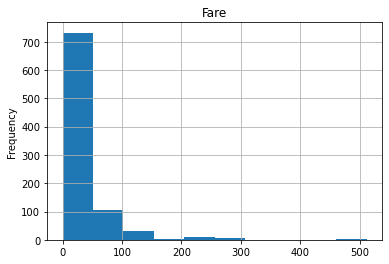

In [6]:
df.Fare.plot(kind="hist")
plt.title("Fare")
plt.grid(True)
plt.show()

<AxesSubplot:>

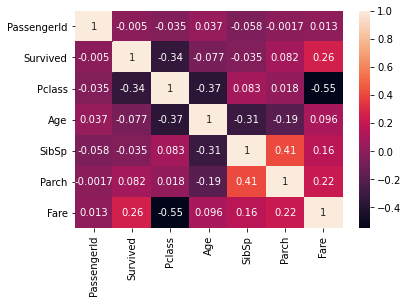

In [7]:
sns.heatmap(df.corr() , annot=True)

### Total count of people survived.

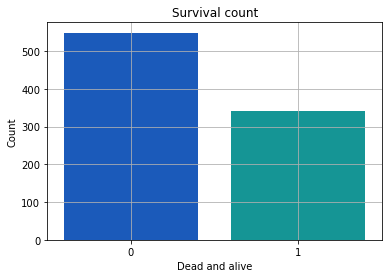

In [8]:
sns.countplot(x="Survived", data=df, palette="winter")
plt.title("Survival count")
plt.xlabel("Dead and alive")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Count of people survived with respect to their class.

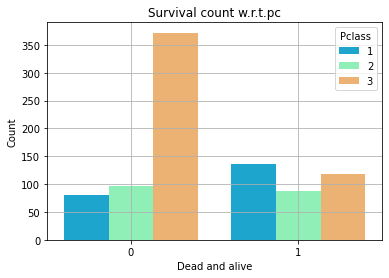

In [9]:
sns.countplot(x="Survived", hue="Pclass",data=df, palette="rainbow")
plt.title("Survival count w.r.t.pc")
plt.xlabel("Dead and alive")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Count of people survived with respect to the gender.

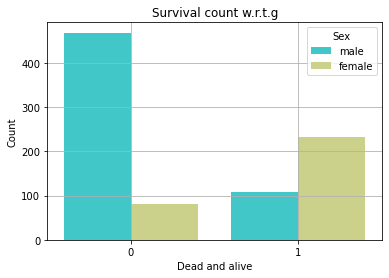

In [10]:
sns.countplot(x="Survived", hue="Sex",data=df, palette="rainbow")
plt.title("Survival count w.r.t.g")
plt.xlabel("Dead and alive")
plt.ylabel("Count")
plt.grid(True)
plt.show()

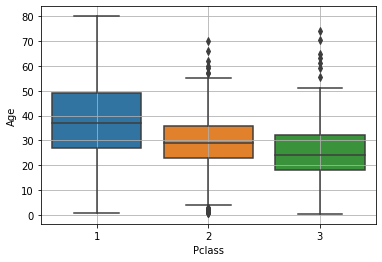

In [11]:
sns.boxplot(x="Pclass", y="Age", data=df)
plt.grid(True)

### Handling the Nan values.

In [12]:
#Filling the nan values in age column by creating a function.

def fillage(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if(pd.isnull(Age)):
        if(Pclass==1):
            return 37
        elif(Pclass==2):
            return 29
        else:
            return 24
    else:
        return Age            

In [13]:
df["Age"] =df[["Age","Pclass"]].apply(fillage, axis=1)

In [14]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
#Droping the "Cabin" column as max amount of data is missing.

df.drop("Cabin", axis =1, inplace=True)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [17]:
#Droping the rows having Nan values

df.dropna(inplace=True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
#Droping the unwanted columns

df.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Splitting the independent set (x) and dependent set (y).

In [21]:
x = df.iloc[:, 1:]
y = df.iloc[:,0]

In [22]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,24.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [23]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### Encoding the non categorical data to numeric data.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [25]:
ct = ColumnTransformer(transformers= [("encoder", OneHotEncoder(), ["Sex", "Embarked"])], remainder="passthrough")
x = np.array(ct.fit_transform(x))

In [26]:
x

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [27]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

### Model creation.

In [28]:
#Splitting the data in training and testing set.

from sklearn.model_selection import train_test_split, cross_val_score
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1)

In [29]:
#Importing the models.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [30]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [31]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    ac = accuracy_score(ytest, ypred)
    cm = confusion_matrix(ytest, ypred)
    cr = classification_report(ytest, ypred)
    print(f"Accuracy :- {ac}\n\nConfusion Matrix :-\n{cm}\n\nClassification Report :-\n{cr}")

In [32]:
models = []

models.append(("Logreg        :- ", LogisticRegression()))
models.append(("KNN           :- ", KNeighborsClassifier()))
models.append(("SVM           :- ", SVC()))
models.append(("DecisionTree  :- ", DecisionTreeClassifier()))


for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Logreg        :- 
Accuracy :- 0.8430493273542601

Confusion Matrix :-
[[120  18]
 [ 17  68]]

Classification Report :-
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       138
           1       0.79      0.80      0.80        85

    accuracy                           0.84       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223





KNN           :- 
Accuracy :- 0.7219730941704036

Confusion Matrix :-
[[110  28]
 [ 34  51]]

Classification Report :-
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       138
           1       0.65      0.60      0.62        85

    accuracy                           0.72       223
   macro avg       0.70      0.70      0.70       223
weighted avg       0.72      0.72      0.72       223





SVM           :- 
Accuracy :- 0.6502242152466368

Confusion Matrix :-
[[113  25]
 [ 53  32]]

Classi

### Hyperparameter Tuning.

In [33]:
accuracy=[]
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

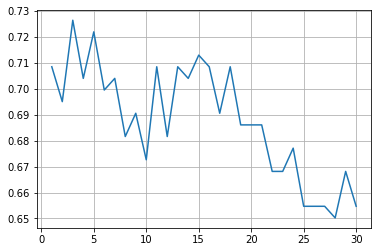

In [34]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

- Based on graph selecting the value of n_neighbors = 3 to achieve max accuracy.

In [35]:
accuracy=[]
for i in range(1,50):
    dt1=DecisionTreeClassifier(criterion="entropy" , max_depth=i)
    dt1.fit(xtrain, ytrain)
    ypred=dt1.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    accuracy.append(ac)

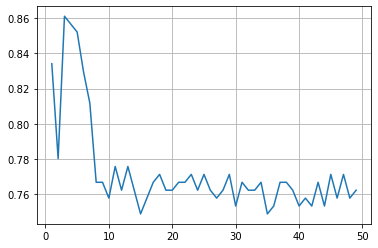

In [36]:
plt.plot(range(1,50), accuracy)
plt.grid(True)
plt.show()

- Based on graph selecting the value of max_depth = 4 to achieve max accuracy.

In [37]:
models = []

models.append(("Logreg        :- ", LogisticRegression(solver="newton-cg")))
models.append(("KNN           :- ", KNeighborsClassifier(n_neighbors=3)))
models.append(("SVM           :- ", SVC(kernel="linear")))
models.append(("DecisionTree  :- ", DecisionTreeClassifier(criterion="entropy" , max_depth=3)))

for name, model in models:
    print(name)
    mymodel(model)
    print("\n\n\n")

Logreg        :- 
Accuracy :- 0.852017937219731

Confusion Matrix :-
[[121  17]
 [ 16  69]]

Classification Report :-
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       138
           1       0.80      0.81      0.81        85

    accuracy                           0.85       223
   macro avg       0.84      0.84      0.84       223
weighted avg       0.85      0.85      0.85       223





KNN           :- 
Accuracy :- 0.726457399103139

Confusion Matrix :-
[[107  31]
 [ 30  55]]

Classification Report :-
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       138
           1       0.64      0.65      0.64        85

    accuracy                           0.73       223
   macro avg       0.71      0.71      0.71       223
weighted avg       0.73      0.73      0.73       223





SVM           :- 
Accuracy :- 0.8340807174887892

Confusion Matrix :-
[[122  16]
 [ 21  64]]

Classifi

### Cross Validation

In [38]:
print("Name              Accuracy                  STD")
for name, model in models:
    cvs = cross_val_score(model, x, y, cv=10, scoring="accuracy")
    print(f"{name} {cvs.mean()} {cvs.std()}")

Name              Accuracy                  STD
Logreg        :-  0.800932073544433 0.020474640209246175
KNN           :-  0.7154877425944841 0.04732745130440096
SVM           :-  0.7862487231869254 0.028647454641857195
DecisionTree  :-  0.8166624106230849 0.028796279221303206


### Conclusion :-

 - The average mean survival rate was 0.3838.    
 - The average mean fare of ship was approx 32£.
 - The age of youngest passenger on the ship was 0.42 years while the age of oldest passenger on the ship was 80 years.
 - The death rate was more than the survival rate.
 - Considering class wise survival the rate of survival of class 1 passengers was the highest.
   - From this it can be concluded that class 1 passengers were given higher priority in rescue operation.
 - Also it can be concluded that class 1 had more senior passengers as compared to other two classes , hence this might also be the reason of giving the class 1 a higher priority while rescuing.
  - Age 28-50 (class 1)
  - Age 21-36 (class 2) 
  - Age 19-31 (class 3)
 - The survival rate of female passengers was much more higher than that of male passengers.
  - From this it can also concluded that rescuing priority was Age and Gender based.
 - Among all the models the highest accuracy is achieved by using Decision Tree Classifier model i.e 86%.

### Achievement :-

 - Successfully achieved the accuracy of above 84%.